In [1]:
5/32 + 5/24 + 25/112 + 19/168 + 137 / (32 * 217)

0.7206221198156683

In [9]:
33554431 * 2

67108862

In [7]:
A = np.array([[5/6, -1/6, -1/6, 0, -1/6, 0],
              [-1/6, 5/6, 0, -1/6, 0, -1/6],
              [-1/6, 0, 5/6, 0, -1/6, -1/6],
              [0, -1/6, 0, 5/6, -1/6, -1/6],
              [-1/6, 0, -1/6, -1/6, 5/6, -1/6],
              [0, -1/6, -1/6, -1/6, -1/6, 5/6]])

b = np.array([1/6, 1/6, 1/6, 1/6, 0, 0])

In [8]:
u = np.linalg.solve(A,b)

In [10]:
u

array([0.43137255, 0.43137255, 0.41176471, 0.41176471, 0.31372549,
       0.31372549])

In [11]:
np.sum(u * np.array([1/9, 1/9, 1/9, 1/9, 5/36, 5/36])) + 1/9

0.38562091503267965

In [13]:
59/153

0.38562091503267976

In [1]:
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
os.chdir('experiments/record')

In [3]:
rng = np.random.default_rng(10)
R = []
N = []
Corners = []
Reps = []
Version = []

NMSE_mean = []
NMSE_se = []
Time_mean = []
Time_se = []
Time_geomean = []
Time_geose = []
Time_min = []
Time_1st = []
Time_med = []
Time_3rd = []
Time_max = []
Time_min_se = []
Time_1st_se = []
Time_med_se = []
Time_3rd_se = []
Time_max_se = []

for fname in os.listdir():
    if fname[:4] != 'BPCG':
        continue
    r = re.search('r_(.+?)_n',fname).group(1)
    n = re.search('n_(.+?)_corners',fname).group(1)
    corners = re.search('corners_(.+?)_reps',fname).group(1)
    reps = re.search('reps_(.+?)_indices',fname).group(1)
    indices = re.search('indices_(.+?)_pattern',fname).group(1) == 'True'
    pattern = re.search('pattern_(.+?)_sparse',fname).group(1) == 'True'
    sparse = re.search('sparse_(.+?).npy',fname).group(1) == 'True'

    R.append(r)
    N.append(n)
    Corners.append(corners)
    Reps.append(reps)

    if (not sparse) and (not indices) and (not pattern):
        Version.append(7)
    elif (not sparse) and indices and pattern:
        Version.append(8)
    elif sparse and (not indices) and (not pattern):
        Version.append(9)
    else:
        Version.append(10)
    
    out = np.load(fname)
    NMSE_mean.append(np.mean(out,0)[0])
    NMSE_se.append((np.std(out,0)/np.sqrt(len(out)))[0])
    Time_mean.append(np.mean(out,0)[1])
    Time_se.append((np.std(out,0)/np.sqrt(len(out)))[1])
    time = out[:,1]
    time_geomean = np.exp(np.sum(np.log(time)) / len(time))
    Time_geomean.append(time_geomean)
    Time_geose.append(np.exp(np.sqrt(np.sum(np.log(time / time_geomean) ** 2) / len(out))))
    Time_min.append(np.min(out,0)[1])
    Time_max.append(np.max(out,0)[1])
    Time_med.append(np.percentile(out,50,0)[1])
    Time_1st.append(np.percentile(out,25,0)[1])
    Time_3rd.append(np.percentile(out,75,0)[1])

    # # use bootstrapping to estimate the standard errors
    # B = 10000
    # mins = np.zeros(B)
    # q_1sts = np.zeros(B)
    # meds = np.zeros(B)
    # q_3rds = np.zeros(B)
    # maxs = np.zeros(B)

    # for i in range(10000):
    #     bs_sample = rng.choice(out[:,1], len(out), replace=True)

    #     mins[i] = np.min(bs_sample)
    #     q_1sts[i] = np.percentile(bs_sample, 25) 
    #     meds[i] = np.percentile(bs_sample, 50)
    #     q_3rds[i] = np.percentile(bs_sample, 75)
    #     maxs[i] = np.max(bs_sample)
    
    # Time_min_se.append(np.std(mins))
    # Time_1st_se.append(np.std(q_1sts))
    # Time_med_se.append(np.std(meds))
    # Time_3rd_se.append(np.std(q_3rds))
    # Time_max_se.append(np.std(maxs))

BPCG_result = pd.DataFrame({
    'r':R,
    'n':N,
    'corners':Corners,
    'reps':Reps,
    'version': Version,
    'NMSE (mean)': np.round(NMSE_mean,3),
    'NMSE (standard error)': np.round(NMSE_se,3),
    'Time (mean)': np.round(Time_mean,3),
    'Time (standard error)': np.round(Time_se,3),
    'Time (geometric mean)': np.round(Time_geomean,3),
    'Time (geometric standard error)': np.round(Time_geose,3),
    'Time (min)': np.round(Time_min,3),
    # 'Time (min standard error)': np.round(Time_min_se,3),
    'Time (1st quantile)': np.round(Time_1st,3),
    # 'Time (1st standard error)': np.round(Time_1st_se,3),
    'Time (median)': np.round(Time_med,3),
    # 'Time (median standard error)': np.round(Time_med_se,3),
    'Time (3rd quantile)': np.round(Time_3rd,3),
    # 'Time (3rd standard error)': np.round(Time_3rd_se,3),
    'Time (max)': np.round(Time_max,3),
    # 'Time (max standard error)': np.round(Time_max_se,3),
})


In [4]:
BPCG_result.to_csv('../../../BPCG_result.csv', index=False)

In [5]:
rng = np.random.default_rng(10)
R = []
N = []
Corners = []
Reps = []
Version = []

NMSE_mean = []
NMSE_se = []
Time_mean = []
Time_se = []
Time_geomean = []
Time_geose = []
Time_min = []
Time_1st = []
Time_med = []
Time_3rd = []
Time_max = []
Time_min_se = []
Time_1st_se = []
Time_med_se = []
Time_3rd_se = []
Time_max_se = []

for fname in os.listdir():
    if fname[:4] == 'BPCG':
        continue

    r = re.search('r_(.+?)_n',fname).group(1)
    n = re.search('n_(.+?)_corners',fname).group(1)
    corners = re.search('corners_(.+?)_reps',fname).group(1)

    try:
        reps = re.search('reps_(.+?)_indices',fname).group(1)
        indices = re.search('indices_(.+?)_pattern',fname).group(1) == 'True'
        pattern = re.search('pattern_(.+?)_sparse',fname).group(1) == 'True'
        sparse = re.search('sparse_(.+?)_nag',fname).group(1) == 'True'
        nag = re.search('nag_(.+?).npy',fname).group(1) == 'True'
        if (not sparse) and ( indices) and (pattern) and (not nag):
            Version.append(1)
        elif ( sparse) and (not indices) and (not pattern) and (not nag):
            Version.append(2)
        elif (not sparse) and (not indices) and (not pattern) and ( nag):
            Version.append(3)
        elif ( sparse) and ( indices) and ( pattern) and (not nag):
            Version.append(4)
        elif (not sparse) and ( indices) and ( pattern) and ( nag):
            Version.append(5)
        else:
            Version.append(6)

    except:
        reps = re.search('reps_(.+?).npy',fname).group(1)
        Version.append(0)

    R.append(r)
    N.append(n)
    Corners.append(corners)
    Reps.append(reps)
    
    out = np.load(fname)
    NMSE_mean.append(np.mean(out,0)[0])
    NMSE_se.append((np.std(out,0)/np.sqrt(len(out)))[0])
    Time_mean.append(np.mean(out,0)[1])
    Time_se.append((np.std(out,0)/np.sqrt(len(out)))[1])
    time = out[:,1]
    time_geomean = np.exp(np.sum(np.log(time)) / len(time))
    Time_geomean.append(time_geomean)
    Time_geose.append(np.exp(np.sqrt(np.sum(np.log(time / time_geomean) ** 2) / len(out))))
    Time_min.append(np.min(out,0)[1])
    Time_max.append(np.max(out,0)[1])
    Time_med.append(np.percentile(out,50,0)[1])
    Time_1st.append(np.percentile(out,25,0)[1])
    Time_3rd.append(np.percentile(out,75,0)[1])

    # # use bootstrapping to estimate the standard errors
    # B = 10000
    # mins = np.zeros(B)
    # q_1sts = np.zeros(B)
    # meds = np.zeros(B)
    # q_3rds = np.zeros(B)
    # maxs = np.zeros(B)

    # for i in range(10000):
    #     bs_sample = rng.choice(out[:,1], len(out), replace=True)

    #     mins[i] = np.min(bs_sample)
    #     q_1sts[i] = np.percentile(bs_sample, 25) 
    #     meds[i] = np.percentile(bs_sample, 50)
    #     q_3rds[i] = np.percentile(bs_sample, 75)
    #     maxs[i] = np.max(bs_sample)
    
    # Time_min_se.append(np.std(mins))
    # Time_1st_se.append(np.std(q_1sts))
    # Time_med_se.append(np.std(meds))
    # Time_3rd_se.append(np.std(q_3rds))
    # Time_max_se.append(np.std(maxs))

result = pd.DataFrame({
    'r':R,
    'n':N,
    'corners':Corners,
    'reps':Reps,
    'version': Version,
    'NMSE (mean)': np.round(NMSE_mean,3),
    'NMSE (standard error)': np.round(NMSE_se,3),
    'Time (mean)': np.round(Time_mean,3),
    'Time (standard error)': np.round(Time_se,3),
    'Time (geometric mean)': np.round(Time_geomean,3),
    'Time (geometric standard error)': np.round(Time_geose,3),
    'Time (min)': np.round(Time_min,3),
    # 'Time (min standard error)': np.round(Time_min_se,3),
    'Time (1st quantile)': np.round(Time_1st,3),
    # 'Time (1st standard error)': np.round(Time_1st_se,3),
    'Time (median)': np.round(Time_med,3),
    # 'Time (median standard error)': np.round(Time_med_se,3),
    'Time (3rd quantile)': np.round(Time_3rd,3),
    # 'Time (3rd standard error)': np.round(Time_3rd_se,3),
    'Time (max)': np.round(Time_max,3),
    # 'Time (max standard error)': np.round(Time_max_se,3),
})

In [6]:
result.to_csv('../../../result.csv', index=False)

In [7]:
all_result = pd.concat([BPCG_result,result])

In [8]:
all_result = all_result.sort_values(['r','n','corners','reps','version']).reset_index(drop=True)

In [9]:
all_result

,r,n,corners,reps,version,NMSE (mean),NMSE (standard error),Time (mean),Time (standard error),Time (geometric mean),Time (geometric standard error),Time (min),Time (1st quantile),Time (median),Time (3rd quantile),Time (max)
0,"(10, 10, 10)",500,10,100,0,0.017,0.001,1.874,0.061,1.777,1.392,0.756,1.485,1.849,2.182,3.935
1,"(10, 10, 10)",500,10,100,1,0.017,0.001,1.054,0.044,0.966,1.532,0.352,0.729,1.006,1.311,2.688
2,"(10, 10, 10)",500,10,100,2,0.018,0.001,2.116,0.071,1.996,1.418,0.757,1.586,2.102,2.567,4.114
3,"(10, 10, 10)",500,10,100,3,0.017,0.001,2.225,0.067,2.120,1.375,0.885,1.739,2.224,2.616,4.234
4,"(10, 10, 10)",500,10,100,4,0.018,0.001,1.346,0.060,1.218,1.575,0.381,0.837,1.277,1.742,2.998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,"(90, 90, 90)",500,10,100,6,0.575,0.004,2.987,0.042,2.958,1.150,2.101,2.751,2.987,3.229,4.231
227,"(90, 90, 90)",500,10,100,7,0.579,0.004,2.257,0.045,2.216,1.206,1.541,1.934,2.108,2.511,3.658
228,"(90, 90, 90)",500,10,100,8,0.579,0.004,2.215,0.045,2.174,1.208,1.474,1.877,2.062,2.421,3.642
229,"(90, 90, 90)",500,10,100,9,0.579,0.004,2.774,0.042,2.744,1.157,1.854,2.494,2.693,2.955,4.205


In [10]:
231 / 11

21.0

In [11]:
all_result.to_csv('../../../all_result.csv', index=False)

In [12]:
first_set = all_result[(all_result['n'] == '500')]
first_set

,r,n,corners,reps,version,NMSE (mean),NMSE (standard error),Time (mean),Time (standard error),Time (geometric mean),Time (geometric standard error),Time (min),Time (1st quantile),Time (median),Time (3rd quantile),Time (max)
0,"(10, 10, 10)",500,10,100,0,0.017,0.001,1.874,0.061,1.777,1.392,0.756,1.485,1.849,2.182,3.935
1,"(10, 10, 10)",500,10,100,1,0.017,0.001,1.054,0.044,0.966,1.532,0.352,0.729,1.006,1.311,2.688
2,"(10, 10, 10)",500,10,100,2,0.018,0.001,2.116,0.071,1.996,1.418,0.757,1.586,2.102,2.567,4.114
3,"(10, 10, 10)",500,10,100,3,0.017,0.001,2.225,0.067,2.120,1.375,0.885,1.739,2.224,2.616,4.234
4,"(10, 10, 10)",500,10,100,4,0.018,0.001,1.346,0.060,1.218,1.575,0.381,0.837,1.277,1.742,2.998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,"(90, 90, 90)",500,10,100,6,0.575,0.004,2.987,0.042,2.958,1.150,2.101,2.751,2.987,3.229,4.231
227,"(90, 90, 90)",500,10,100,7,0.579,0.004,2.257,0.045,2.216,1.206,1.541,1.934,2.108,2.511,3.658
228,"(90, 90, 90)",500,10,100,8,0.579,0.004,2.215,0.045,2.174,1.208,1.474,1.877,2.062,2.421,3.642
229,"(90, 90, 90)",500,10,100,9,0.579,0.004,2.774,0.042,2.744,1.157,1.854,2.494,2.693,2.955,4.205


In [13]:
first_set.to_csv('../../../first_set.csv',index=False)

In [14]:
first_set['r_i'] = first_set['r'].apply(lambda x: int(re.search(', (.+?),',x).group(1)))
first_set = first_set.sort_values('r_i')

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\2360319601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_set['r_i'] = first_set['r'].apply(lambda x: int(re.search(', (.+?),',x).group(1)))


C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\2771908456.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


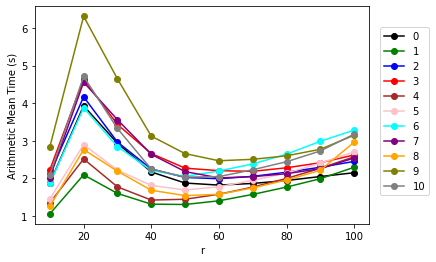

In [15]:
fig, ax = plt.subplots()
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 0],c='black',label=0)
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 1],c='green',label=1)
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 2],c='blue',label=2)
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 3],c='red',label=3)
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 4],c='brown',label=4)
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 5],c='pink',label=5)
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 6],c='cyan',label=6)
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 7],c='purple',label=7)
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 8],c='orange',label=8)
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 9],c='olive',label=9)
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 10],c='gray',label=10)
ax.set_xlabel('r')
ax.set_ylabel('Arithmetic Mean Time (s)')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\1218498047.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


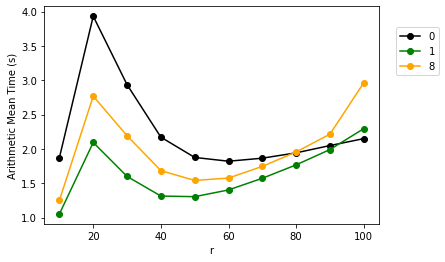

In [16]:
fig, ax = plt.subplots()
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 0],c='black',label=0)
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 1],c='green',label=1)
ax.plot('r_i', 'Time (mean)','-o',data=first_set[first_set['version'] == 8],c='orange',label=8)
ax.set_xlabel('r')
ax.set_ylabel('Arithmetic Mean Time (s)')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\1501558329.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


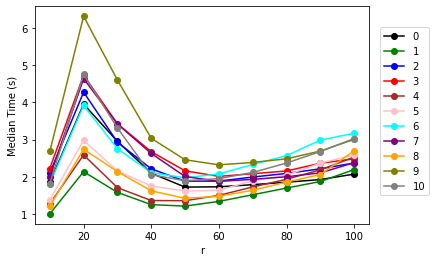

In [17]:
fig, ax = plt.subplots()
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 0],c='black',label=0)
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 1],c='green',label=1)
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 2],c='blue',label=2)
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 3],c='red',label=3)
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 4],c='brown',label=4)
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 5],c='pink',label=5)
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 6],c='cyan',label=6)
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 7],c='purple',label=7)
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 8],c='orange',label=8)
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 9],c='olive',label=9)
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 10],c='gray',label=10)
ax.set_xlabel('r')
ax.set_ylabel('Median Time (s)')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\3277946944.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


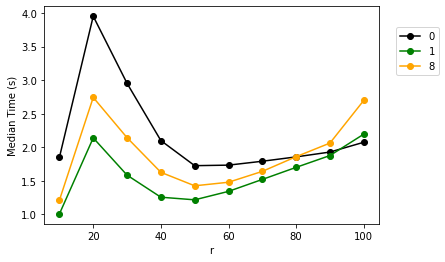

In [18]:
fig, ax = plt.subplots()
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 0],c='black',label=0)
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 1],c='green',label=1)
ax.plot('r_i', 'Time (median)','-o',data=first_set[first_set['version'] == 8],c='orange',label=8)
ax.set_xlabel('r')
ax.set_ylabel('Median Time (s)')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

In [19]:
second_set = all_result[(all_result['n'] == '10000')]
second_set.shape

(55, 16)

In [20]:
second_set['p'] = second_set['r'].apply(lambda x: (len(x))//4)

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\660323385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_set['p'] = second_set['r'].apply(lambda x: (len(x))//4)


In [21]:
second_set.to_csv('../../../second_set.csv',index=False)

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\447134.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


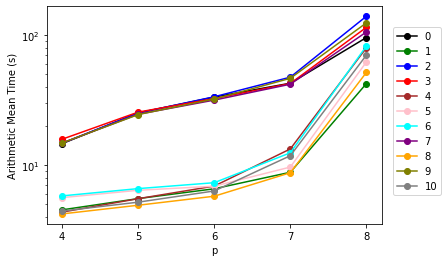

In [22]:
fig, ax = plt.subplots()
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 0],c='black',label=0)
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 1],c='green',label=1)
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 2],c='blue',label=2)
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 3],c='red',label=3)
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 4],c='brown',label=4)
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 5],c='pink',label=5)
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 6],c='cyan',label=6)
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 7],c='purple',label=7)
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 8],c='orange',label=8)
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 9],c='olive',label=9)
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 10],c='gray',label=10)
ax.set_xlabel('p')
ax.set_xticks([4,5,6,7,8])
ax.set_ylabel('Arithmetic Mean Time (s)')
ax.set_yscale('log')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\2656150802.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


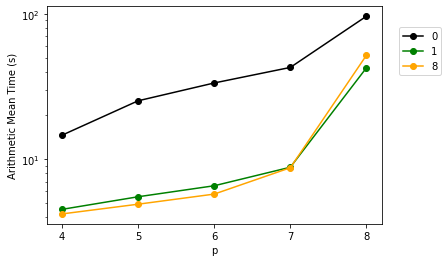

In [23]:
fig, ax = plt.subplots()
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 0],c='black',label=0)
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 1],c='green',label=1)
ax.plot('p', 'Time (mean)','-o',data=second_set[second_set['version'] == 8],c='orange',label=8)
ax.set_xlabel('p')
ax.set_xticks([4,5,6,7,8])
ax.set_ylabel('Arithmetic Mean Time (s)')
ax.set_yscale('log')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\1279353645.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


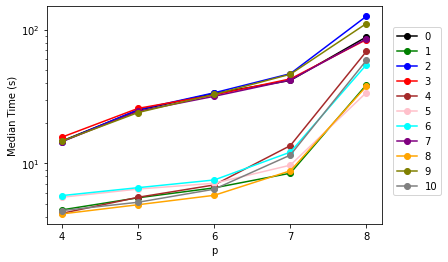

In [24]:
fig, ax = plt.subplots()
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 0],c='black',label=0)
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 1],c='green',label=1)
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 2],c='blue',label=2)
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 3],c='red',label=3)
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 4],c='brown',label=4)
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 5],c='pink',label=5)
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 6],c='cyan',label=6)
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 7],c='purple',label=7)
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 8],c='orange',label=8)
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 9],c='olive',label=9)
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 10],c='gray',label=10)
ax.set_xlabel('p')
ax.set_xticks([4,5,6,7,8])
ax.set_ylabel('Median Time (s)')
ax.set_yscale('log')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\1242917596.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


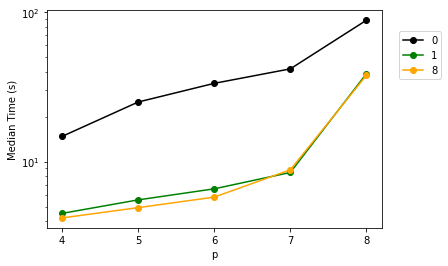

In [25]:
fig, ax = plt.subplots()
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 0],c='black',label=0)
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 1],c='green',label=1)
ax.plot('p', 'Time (median)','-o',data=second_set[second_set['version'] == 8],c='orange',label=8)
ax.set_xlabel('p')
ax.set_xticks([4,5,6,7,8])
ax.set_ylabel('Median Time (s)')
ax.set_yscale('log')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

In [26]:
third_set = all_result[all_result['r'] == '(10, 10, 10, 10, 10, 10)']
third_set.shape

(44, 16)

In [27]:
third_set.to_csv('../../../third_set.csv',index=False)

In [28]:
third_set['percent'] = third_set['n'].astype(int) / 1e6 * 100

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\3164698110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_set['percent'] = third_set['n'].astype(int) / 1e6 * 100


C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\2944395717.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


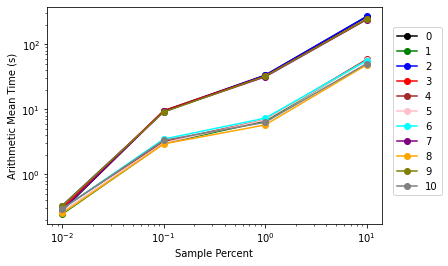

In [29]:
fig, ax = plt.subplots()
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 0],c='black',label=0)
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 1],c='green',label=1)
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 2],c='blue',label=2)
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 3],c='red',label=3)
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 4],c='brown',label=4)
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 5],c='pink',label=5)
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 6],c='cyan',label=6)
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 7],c='purple',label=7)
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 8],c='orange',label=8)
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 9],c='olive',label=9)
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 10],c='gray',label=10)
ax.set_xlabel('Sample Percent')
ax.set_xscale('log')
ax.set_ylabel('Arithmetic Mean Time (s)')
ax.set_yscale('log')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\1712418215.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


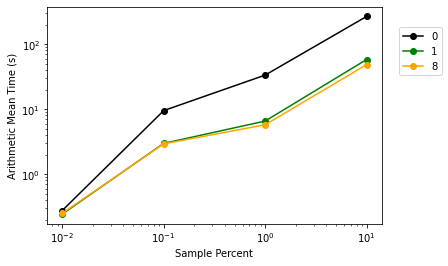

In [30]:
fig, ax = plt.subplots()
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 0],c='black',label=0)
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 1],c='green',label=1)
ax.plot('percent', 'Time (mean)','-o',data=third_set[third_set['version'] == 8],c='orange',label=8)
ax.set_xlabel('Sample Percent')
ax.set_xscale('log')
ax.set_ylabel('Arithmetic Mean Time (s)')
ax.set_yscale('log')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\1240642001.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


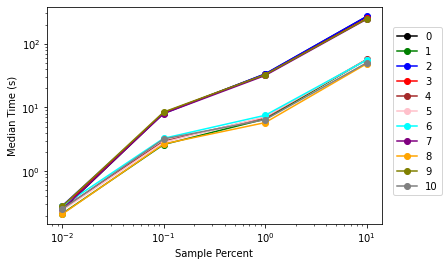

In [31]:
fig, ax = plt.subplots()
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 0],c='black',label=0)
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 1],c='green',label=1)
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 2],c='blue',label=2)
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 3],c='red',label=3)
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 4],c='brown',label=4)
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 5],c='pink',label=5)
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 6],c='cyan',label=6)
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 7],c='purple',label=7)
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 8],c='orange',label=8)
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 9],c='olive',label=9)
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 10],c='gray',label=10)
ax.set_xlabel('Sample Percent')
ax.set_xscale('log')
ax.set_ylabel('Median Time (s)')
ax.set_yscale('log')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\923699187.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


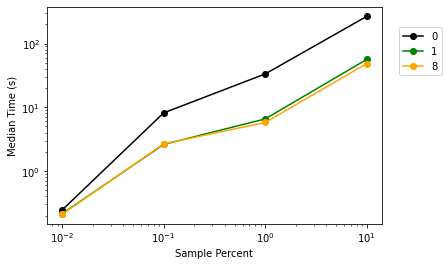

In [32]:
fig, ax = plt.subplots()
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 0],c='black',label=0)
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 1],c='green',label=1)
ax.plot('percent', 'Time (median)','-o',data=third_set[third_set['version'] == 8],c='orange',label=8)
ax.set_xlabel('Sample Percent')
ax.set_xscale('log')
ax.set_ylabel('Median Time (s)')
ax.set_yscale('log')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

In [33]:
fourth_set = all_result[(all_result['r'] == '(10, 10, 10, 10, 10, 10, 10)') & (all_result['reps'] == '100')]
fourth_set.shape

(44, 16)

In [34]:
fourth_set.to_csv('../../../fourth_set.csv',index=False)

In [35]:
fourth_set['percent'] = fourth_set['n'].astype(int) / 1e7 * 100

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\423899251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_set['percent'] = fourth_set['n'].astype(int) / 1e7 * 100


C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\2600013283.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


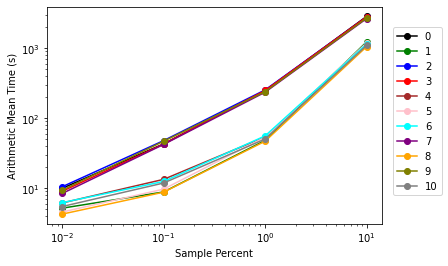

In [36]:
fig, ax = plt.subplots()
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 0],c='black',label=0)
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 1],c='green',label=1)
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 2],c='blue',label=2)
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 3],c='red',label=3)
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 4],c='brown',label=4)
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 5],c='pink',label=5)
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 6],c='cyan',label=6)
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 7],c='purple',label=7)
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 8],c='orange',label=8)
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 9],c='olive',label=9)
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 10],c='gray',label=10)
ax.set_xlabel('Sample Percent')
ax.set_xscale('log')
ax.set_ylabel('Arithmetic Mean Time (s)')
ax.set_yscale('log')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\2003828317.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


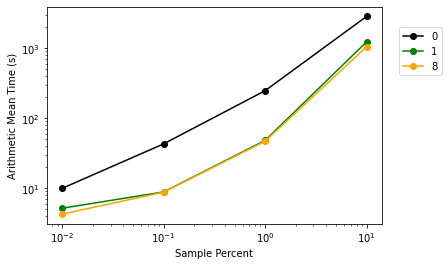

In [37]:
fig, ax = plt.subplots()
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 0],c='black',label=0)
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 1],c='green',label=1)
ax.plot('percent', 'Time (mean)','-o',data=fourth_set[fourth_set['version'] == 8],c='orange',label=8)
ax.set_xlabel('Sample Percent')
ax.set_xscale('log')
ax.set_ylabel('Arithmetic Mean Time (s)')
ax.set_yscale('log')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\3050951228.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


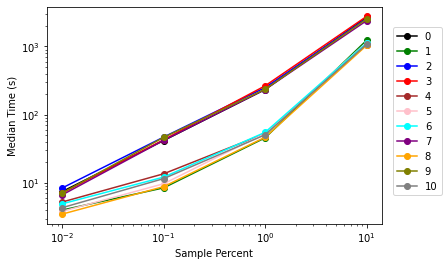

In [38]:
fig, ax = plt.subplots()
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 0],c='black',label=0)
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 1],c='green',label=1)
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 2],c='blue',label=2)
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 3],c='red',label=3)
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 4],c='brown',label=4)
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 5],c='pink',label=5)
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 6],c='cyan',label=6)
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 7],c='purple',label=7)
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 8],c='orange',label=8)
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 9],c='olive',label=9)
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 10],c='gray',label=10)
ax.set_xlabel('Sample Percent')
ax.set_xscale('log')
ax.set_ylabel('Median Time (s)')
ax.set_yscale('log')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_12584\1499257626.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


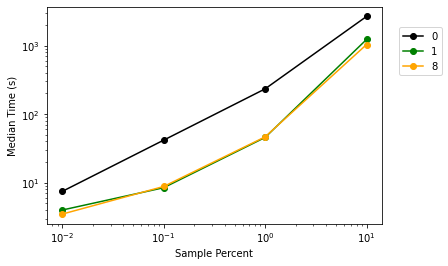

In [39]:
fig, ax = plt.subplots()
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 0],c='black',label=0)
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 1],c='green',label=1)
ax.plot('percent', 'Time (median)','-o',data=fourth_set[fourth_set['version'] == 8],c='orange',label=8)
ax.set_xlabel('Sample Percent')
ax.set_xscale('log')
ax.set_ylabel('Median Time (s)')
ax.set_yscale('log')
fig.legend(bbox_to_anchor=(1.05,0.825))
fig.show()

In [40]:
example = np.load('BPCG_r_(10, 10, 10, 10, 10, 10, 10)_n_1000000_corners_10_reps_100_indices_False_pattern_False_sparse_False.npy')

In [41]:
np.prod(example[:,1]) / len(example[:,1])

c:\Users\Wenhao\miniconda3\envs\TenCom\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


inf

In [42]:
np.exp(np.sum(np.log(example[:,1])) / len(example[:,1]))

2583.335399720351